IRIS Classifcation


<b>Import Required Dependencies</b>

In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#import scoring and report metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<b>Load IRIS Dataset</b>

In [31]:
data = pd.read_csv(r"C:\Users\hp\Untitled Folder\IRIS.csv")

In [34]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<b>Statistical Summary</b>

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<b> Class Distribution</b>

In [12]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<b>Data Visualization</b>

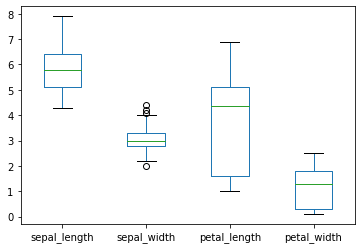

In [13]:
data.boxplot(grid = False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D790318EC8>,
      dtype=object)

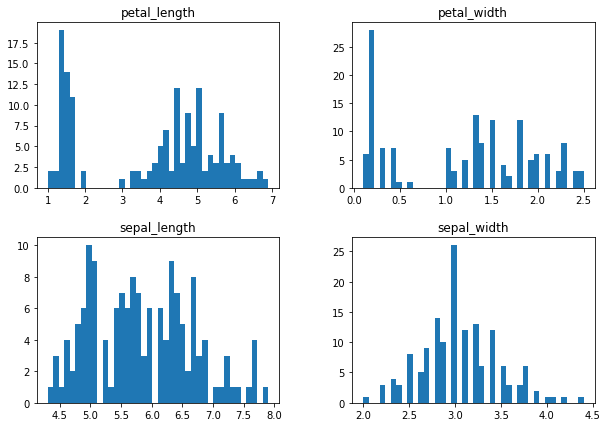

In [14]:
data.hist(grid=False,bins=40,figsize=[10,7])

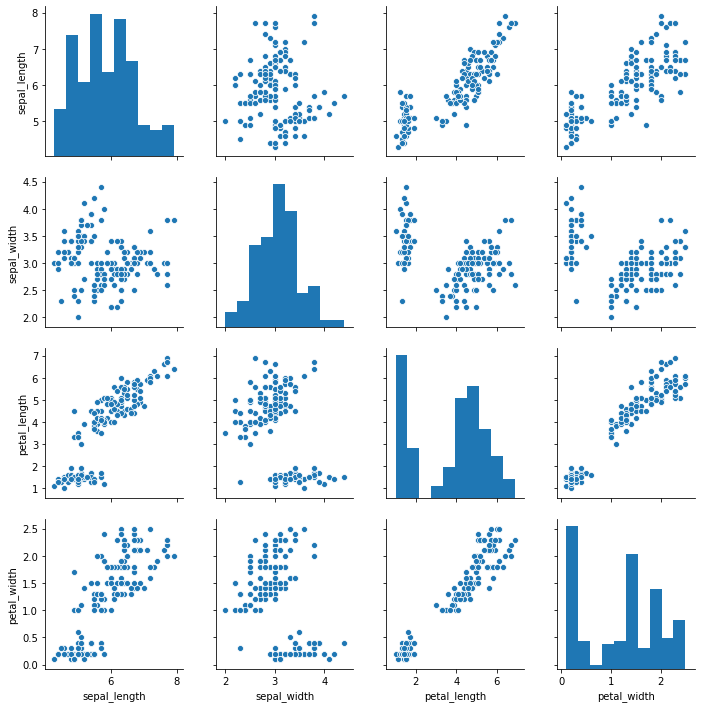

In [15]:
sns.pairplot(data,kind='scatter')

In [37]:
data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<b> Split Dataset into Training and Test sets</b>


In [187]:
X = data.drop(['species'],axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=102)

<b>Validation</b> <br>
I will be using 10-fold cross-validation in order to determine effectiveness of training. This will split the training dataset into 10 parts (folds) and use 9 for training and 1 for validation testing. This allows us to keep our test set pure and remain unbiased while using validation set to tune hyperparameters.

<b>Model Buliding</b><br>
We don't know exactly which type of model will be best at solving this dataset. From the data visualization above it appears that some variables may be linearly seperable. We will use both linear and non-linear models in this phase.<br>

The algorithms used for this section are:<br>

Logistic Regression (LR)<br>
Linear Discriminant Analysis (LDA)<br>
K-Nearest Neighbour (KNN)<br>
Classification and Regression Trees (CART)<br>
Gaussian Naive Bayes (NB)<br>
Support Vector Machine (SVM)<br>


In [188]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))
results = []
names = []

#loop through models and train
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.925455 (0.079752)
LDA: 0.981818 (0.036364)
KNN: 0.971818 (0.059259)
CART: 0.953636 (0.061718)
NB: 0.963636 (0.060302)
SVM: 0.971818 (0.059259)


<b>Make Predictions</b><br>
<b>KNN</b>



In [189]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [190]:
predictions = knn.predict(X_test)
score_knn = accuracy_score(y_test, predictions)
print(score_knn)

0.9333333333333333


In [191]:
#confusion metris and classification report
conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix\n", conf_mat)
class_rep = classification_report(y_test, predictions)
print("Classification Report\n", class_rep)

Confusion Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



<b>SVM</b>


In [192]:
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [193]:
predictions2 = svm.predict(X_test)
score_svm = accuracy_score(y_test, predictions2)
print(score_svm)

0.9555555555555556


In [179]:
# print confusion matrix and classification report
conf_mat2 = confusion_matrix(y_test, predictions2)
print("Confusion Matrix\n", conf_mat)
class_rep2 = classification_report(y_test, predictions2)
print("Classification Report\n", class_rep2)

Confusion Matrix
 [[14  0  0]
 [ 0 10  0]
 [ 0  1 13]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



<b>Conclusion</b><br>
Since our accuracy on SVM model (95.555%) was greater than that of our KNN model (93.333%) it can be deemed that the SVM model is best for our dataset.
